# Non-Metric MDS Stress Analysis on Iris Dataset

This notebook analyzes how stress values change with the number of dimensions in Non-Metric MDS when applied to the Iris dataset.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## Load and Prepare Iris Dataset

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Dataset shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"Classes: {target_names}")
print(f"Number of samples per class: {np.bincount(y)}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nData standardized!")

Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Number of samples per class: [50 50 50]

Data standardized!


## Compute Non-Metric MDS for Different Dimensions

In [ ]:
# Test dimensions from 1 to 4 (original dataset has 4 dimensions)
dimensions = range(1, 5)
stress_values = []

print("Computing Non-Metric MDS for different dimensions...\n")

for n_dim in dimensions:
    print(f"Computing for {n_dim}D...", end=" ")

    # Non-Metric MDS
    mds = MDS(n_components=n_dim, metric=False, random_state=42, max_iter=300, n_init=4)
    X_embedded = mds.fit_transform(X_scaled)

    # Get stress value
    stress = mds.stress_
    stress_values.append(stress)

    print(f"Stress = {stress:.4f}")

print("\nComputation complete!")

Computing Non-Metric MDS for different dimensions...

Computing for 1D... Stress = 0.2718
Computing for 2D... Stress = 0.0422
Computing for 3D... Stress = 0.0079
Computing for 4D... Stress = 0.0071

Computation complete!


## Visualize Stress vs Number of Dimensions

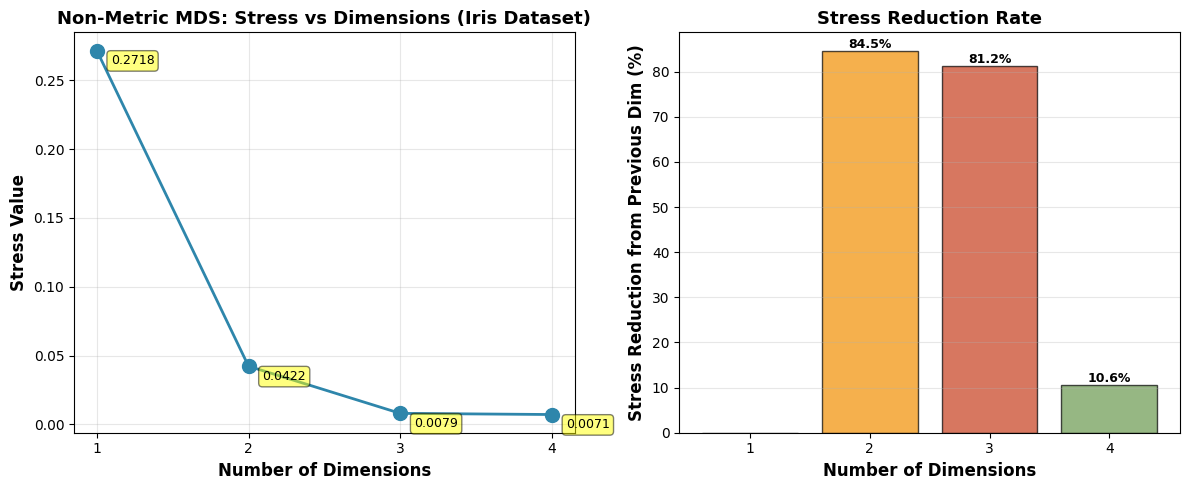


STRESS VALUES SUMMARY
1D: Stress = 0.271777
2D: Stress = 0.042206
3D: Stress = 0.007918
4D: Stress = 0.007082


In [ ]:
# Create visualization
plt.figure(figsize=(12, 5))

# Plot 1: Stress vs Dimensions (Line plot)
plt.subplot(1, 2, 1)
plt.plot(dimensions, stress_values, marker='o', linewidth=2, markersize=10, color='#2E86AB')
plt.xlabel('Number of Dimensions', fontsize=12, fontweight='bold')
plt.ylabel('Stress Value', fontsize=12, fontweight='bold')
plt.title('Non-Metric MDS: Stress vs Dimensions (Iris Dataset)', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(dimensions)

# Annotate each point with stress value
for i, (dim, stress) in enumerate(zip(dimensions, stress_values)):
    plt.annotate(f'{stress:.4f}',
                xy=(dim, stress),
                xytext=(10, -10),
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

# Plot 2: Stress reduction (Bar plot showing % decrease)
plt.subplot(1, 2, 2)
stress_reduction = [0]  # First dimension has no reduction
for i in range(1, len(stress_values)):
    reduction = ((stress_values[i-1] - stress_values[i]) / stress_values[i-1]) * 100
    stress_reduction.append(reduction)

colors = ['#A23B72', '#F18F01', '#C73E1D', '#6A994E']
bars = plt.bar(dimensions, stress_reduction, color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Number of Dimensions', fontsize=12, fontweight='bold')
plt.ylabel('Stress Reduction from Previous Dim (%)', fontsize=12, fontweight='bold')
plt.title('Stress Reduction Rate', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(dimensions)

# Annotate bars
for bar, reduction in zip(bars, stress_reduction):
    if reduction > 0:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{reduction:.1f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*60)
print("STRESS VALUES SUMMARY")
print("="*60)
for dim, stress in zip(dimensions, stress_values):
    print(f"{dim}D: Stress = {stress:.6f}")
print("="*60)

## Visual Comparison: 1D vs 2D vs 3D Embeddings

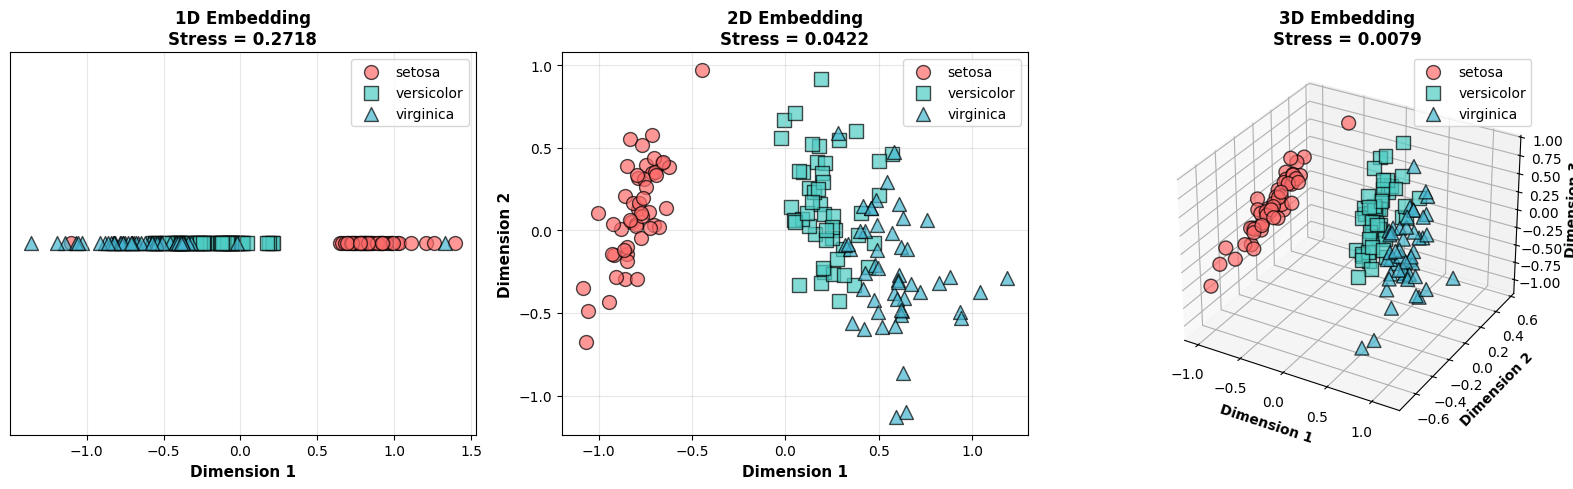


Observations:
- 1D: Points are forced onto a line → high overlap → high stress
- 2D: Points can spread in a plane → better separation → lower stress
- 3D: Points can spread in space → even better separation → lowest stress


In [ ]:
# Compute embeddings for visualization
mds_1d = MDS(n_components=1, metric=False, random_state=42, max_iter=300, n_init=4)
X_1d = mds_1d.fit_transform(X_scaled)

mds_2d = MDS(n_components=2, metric=False, random_state=42, max_iter=300, n_init=4)
X_2d = mds_2d.fit_transform(X_scaled)

mds_3d = MDS(n_components=3, metric=False, random_state=42, max_iter=300, n_init=4)
X_3d = mds_3d.fit_transform(X_scaled)

# Create visualizations
fig = plt.figure(figsize=(16, 5))

# Color map for classes
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
markers = ['o', 's', '^']

# Plot 1D embedding
ax1 = plt.subplot(1, 3, 1)
for i, (color, marker, name) in enumerate(zip(colors, markers, target_names)):
    mask = y == i
    plt.scatter(X_1d[mask, 0], np.zeros_like(X_1d[mask, 0]),
               c=color, marker=marker, s=100, alpha=0.7,
               edgecolors='black', linewidth=1, label=name)
plt.xlabel('Dimension 1', fontsize=11, fontweight='bold')
plt.title(f'1D Embedding\nStress = {mds_1d.stress_:.4f}', fontsize=12, fontweight='bold')
plt.yticks([])
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

# Plot 2D embedding
ax2 = plt.subplot(1, 3, 2)
for i, (color, marker, name) in enumerate(zip(colors, markers, target_names)):
    mask = y == i
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1],
               c=color, marker=marker, s=100, alpha=0.7,
               edgecolors='black', linewidth=1, label=name)
plt.xlabel('Dimension 1', fontsize=11, fontweight='bold')
plt.ylabel('Dimension 2', fontsize=11, fontweight='bold')
plt.title(f'2D Embedding\nStress = {mds_2d.stress_:.4f}', fontsize=12, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

# Plot 3D embedding
ax3 = plt.subplot(1, 3, 3, projection='3d')
for i, (color, marker, name) in enumerate(zip(colors, markers, target_names)):
    mask = y == i
    ax3.scatter(X_3d[mask, 0], X_3d[mask, 1], X_3d[mask, 2],
               c=color, marker=marker, s=100, alpha=0.7,
               edgecolors='black', linewidth=1, label=name)
ax3.set_xlabel('Dimension 1', fontsize=10, fontweight='bold')
ax3.set_ylabel('Dimension 2', fontsize=10, fontweight='bold')
ax3.set_zlabel('Dimension 3', fontsize=10, fontweight='bold')
ax3.set_title(f'3D Embedding\nStress = {mds_3d.stress_:.4f}', fontsize=12, fontweight='bold')
ax3.legend(loc='upper right')

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- 1D: Points are forced onto a line → high overlap → high stress")
print("- 2D: Points can spread in a plane → better separation → lower stress")
print("- 3D: Points can spread in space → even better separation → lowest stress")

## Key Takeaways

### Results Summary:
- **1D → 2D**: Stress dropped by **84.5%** (from 0.2718 to 0.0422)
- **2D → 3D**: Stress dropped by **81.2%** (from 0.0422 to 0.0079)  
- **3D → 4D**: Stress dropped by **10.6%** (from 0.0079 to 0.0071)

### Why Stress Decreases:
1. **More degrees of freedom** - Higher dimensions provide more "room" to arrange points
2. **Better constraint satisfaction** - Can preserve more distance relationships simultaneously
3. **Reduced information loss** - Closer to original 4D space = less distortion
4. **Geometric flexibility** - Complex distance relationships can be better represented

### Optimal Dimensionality:
The sharp drop from 1D→2D and 2D→3D shows that **2D captures most essential structure** while remaining visualizable. The small improvement from 3D→4D suggests diminishing returns beyond 2-3 dimensions.